# Dice Math

## Imports

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random

## Inits

In [138]:
atk_dice = 4
hit_char = 2
norm_dam = 4
crit_dam = 4
opp_save = 5

In [131]:
trials = 10000
opp_wounds = 20

## Functions

In [82]:
def run_dice_sim(atk_dice: int, hit_char: int, norm_dam: int,
                 crit_dam: int, opp_save: int):
    """
    Runs the attacker and defense dice at a basic level to obtain
    a damage output for a shooting attack.

    Inputs:
        - atk_dice: int, the number of attack dice
        - hit_char: int, the hit stat of the weapon
        - norm_dam: int, the normal damage stat of that weapon
        - crit_dam: int, the critical damage stat of that weapon
        - opp_save: int, the save characteristic of the opponent

    Returns: int, the amount of damage that goes through

    """
    dam_dict = {
        "Norm": norm_dam,
        "Crit": crit_dam,
        "Fail": 0
    }

    # Attacker Roll
    roll_results = []
    for _ in range(atk_dice):
        roll = random.randint(1, 6)
        roll_results.append(roll)
    
    hits = []
    for rr in roll_results:
        if rr == 6:
            hits.append("Crit")
        elif rr >= hit_char:
            hits.append("Norm")
        else:
            hits.append("Fail")
    
    # Defender Roll
    save_roll_results = []
    for _ in range(3):
        roll = random.randint(1, 6)
        save_roll_results.append(roll)
    
    saves = []
    for save in save_roll_results:
        if save == 6:
            saves.append("Crit")
        elif save >= opp_save:
            saves.append("Norm")
        else:
            saves.append("Fail")

    # Resolution of Crits
    for _ in range(saves.count("Crit")):
        if "Crit" in saves and "Crit" in hits:
            saves.remove("Crit")
            hits.remove("Crit")
        elif "Crit" in saves and "Norm" in hits:
            saves.remove("Crit")
            hits.remove("Norm")

    # Resolution of Normals
    for _ in range(saves.count("Norm")):
        if "Norm" in saves and "Norm" in hits:
            saves.remove("Norm")
            hits.remove("Norm")

    # Resolution of Crits with Normal Saves
    if "Crit" in hits and saves.count("Norm") >= 2:
        hits.remove("Crit")
        saves.remove("Norm")
        saves.remove("Norm")

    # Damage Resolution
    return sum([dam_dict.get(item, item) for item in hits])

In [13]:
def get_dice_stats(trials: int, opp_wounds: int):

    damage_list = []
    for _ in range(trials):
        damage_list.append(run_dice_sim(atk_dice, hit_char, 
                                        norm_dam, crit_dam, opp_save))
    
    average_damage = np.average(damage_list)
    prob_to_wound = len([num for num in damage_list if num >= (opp_wounds/2)]
                        )/len(damage_list)
    prob_to_kill = len([num for num in damage_list if num >= opp_wounds]
                        )/len(damage_list)

    return (damage_list, average_damage, prob_to_wound, prob_to_kill)

## Simulate

Text(0.5, 0.5, 'Average Damage: 9.46\nProbability to Injure: 0.48\nProbability to Incapacitate: 0.00')

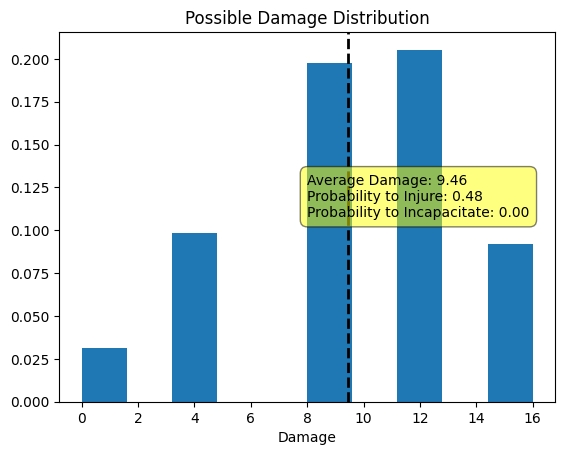

In [139]:
stats = get_dice_stats(trials, opp_wounds)
plt.hist(stats[0], density=True)
plt.axvline(stats[1], color='black', linestyle='dashed', linewidth=2, label=f'Mean Damage: {stats[1]:.2f}')
plt.xlabel("Damage")
plt.title("Possible Damage Distribution")
plt.show

stats_text = f'Average Damage: {stats[1]:.2f}\nProbability to Injure: {stats[2]:.2f}\nProbability to Incapacitate: {stats[3]:.2f}'
plt.text(0.5, 0.5, stats_text, transform=plt.gca().transAxes,
         fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.5))